## Data source

- Original owners: Unknown
- Downloaded: https://www.kaggle.com/datasets/halimedogan/usarrests

## Attribute Information

Dataset contains the .

1. Unknown: Data per state
2. Murder: Number of murders per thousand people
3. Assault: Assault of murders per thousand people
4. UrbanPop: Ratio of urbanized citizens
5. Rape: Rape of murders per thousand people


In [1]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/home/znagy2/data_development/notebooks/ML_practice/input/USArrests.csv")

## Exploratory Data Analysis

### Understanding the variables

I'll check the dimension of the dataset as a first step.

In [3]:
print("We have ", data.shape[0], " individual observations, and ", data.shape[-1], " variables.")
data.head()

We have  50  individual observations, and  5  variables.


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


The variables are mainly numeric ones, only the first column contains categorical variable.

I'll check the number of missing values in case of variables and visualize the dataset.

In [4]:
data.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

<AxesSubplot:>

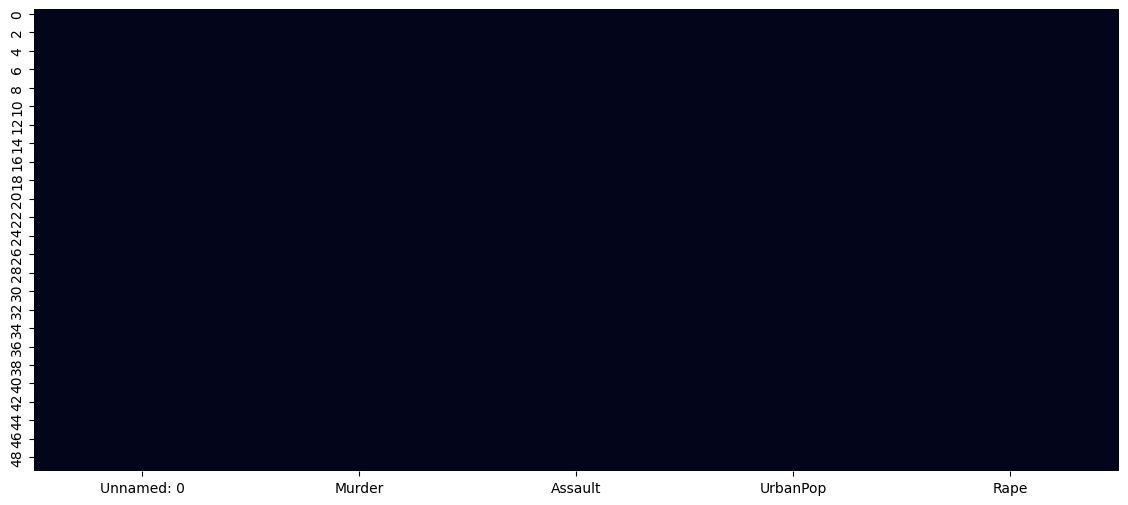

In [5]:
# visualize on a heatmap
plt.figure(figsize=(14,6))
sns.heatmap(data.isnull(), cbar=False)

We can conclude that there is no any missing value. Let me check the duplicated rows.

In [6]:
print("The dataset contains", data.duplicated().sum(), "duplicated row(s).")

The dataset contains 0 duplicated row(s).


I'll check the data type of variables, it should be numeric (int or float).

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


I do not have any duplicated rows, so I can check the number of unique values by variables.

In [8]:
data.nunique(axis=0)

Unnamed: 0    50
Murder        43
Assault       45
UrbanPop      36
Rape          48
dtype: int64

I'll take a look on the basic statistic relating the columns.

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


The dataset is clean:
- data types looks like fine
- missing values were not identified
- duplicated rows were not identified

### Visualize data and relationships
 I'll calculate and plot the correlation matrix, which give me a better insight into the relationship of variables.

<AxesSubplot:>

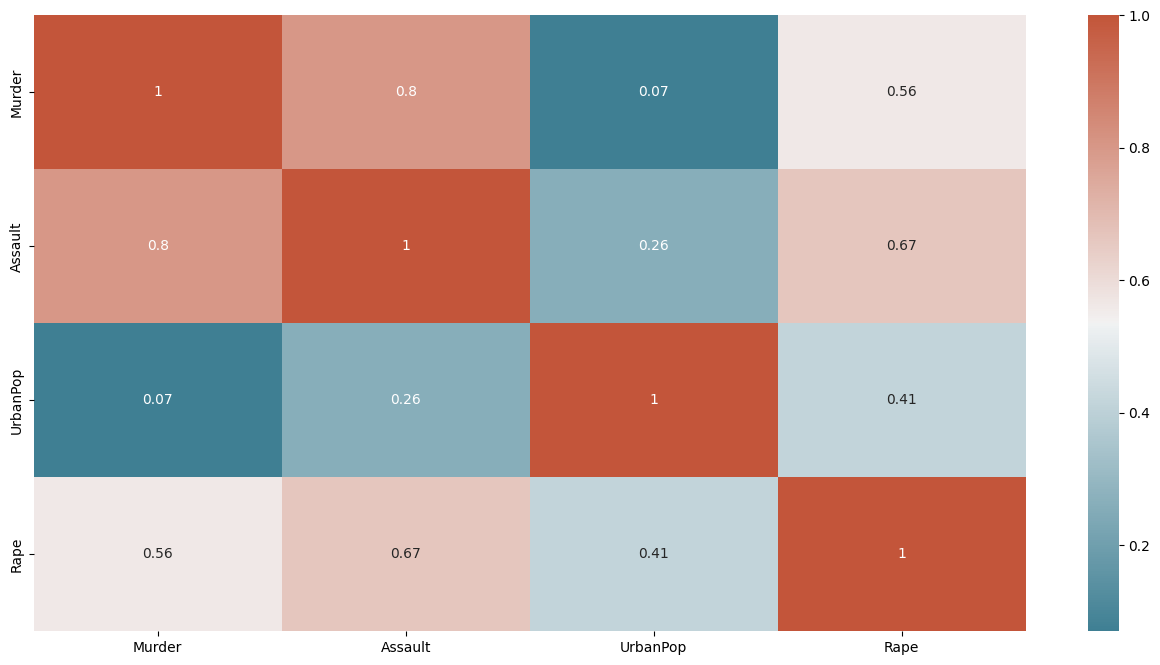

In [10]:
# calculate correlation matrix
corr = data.corr()
# plot the heatmap
plt.figure(figsize=(16,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Due to the several variables I won't go through the whole matrix, but I draw the main conclusions:
1. Correlation between the different crime types are high (>0.5 - 0.8)
2. Urban population ratio is weakly correlates with Assault and Rape number.

I'll visualize the correlation between the variables.

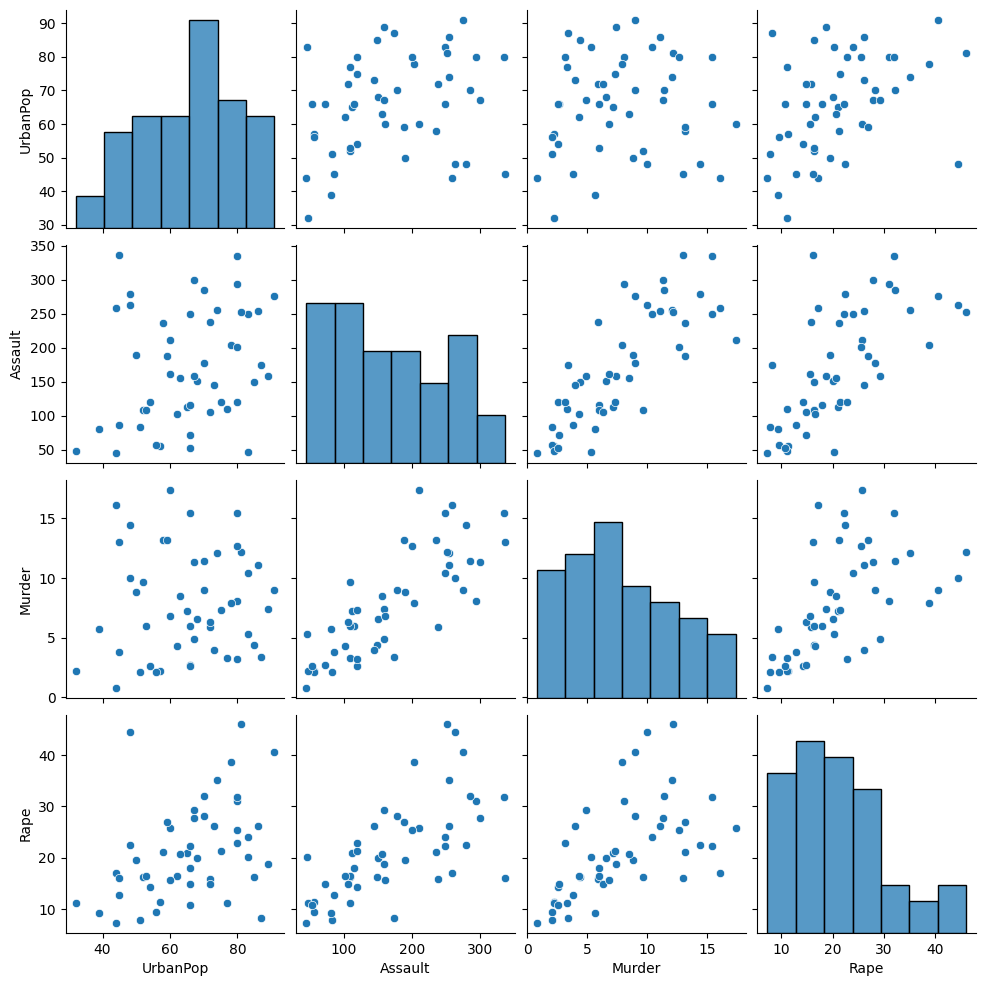

In [11]:
sns.pairplot(data.loc[:, ["UrbanPop","Assault","Murder", "Rape"]])

Finally, I'll plot the histograms and the box plot (to visualize outliers) in case of every variables with this utility function.

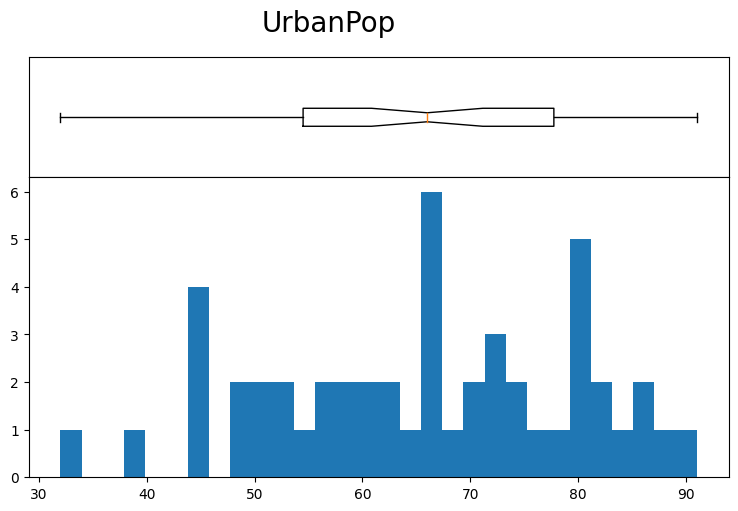

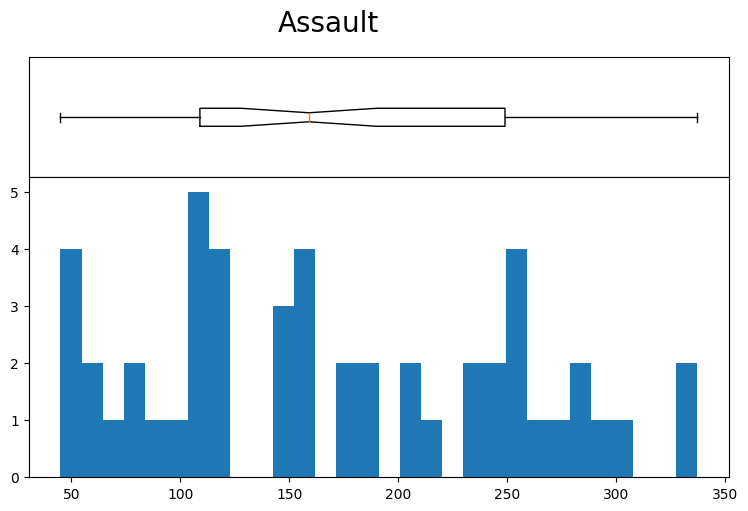

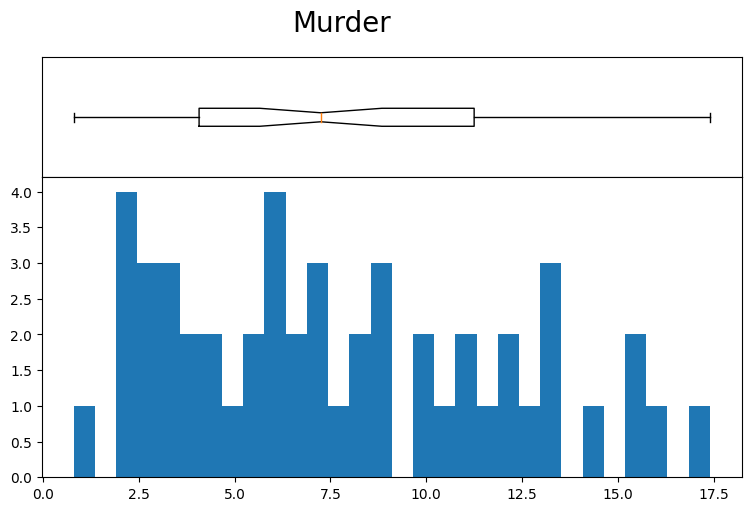

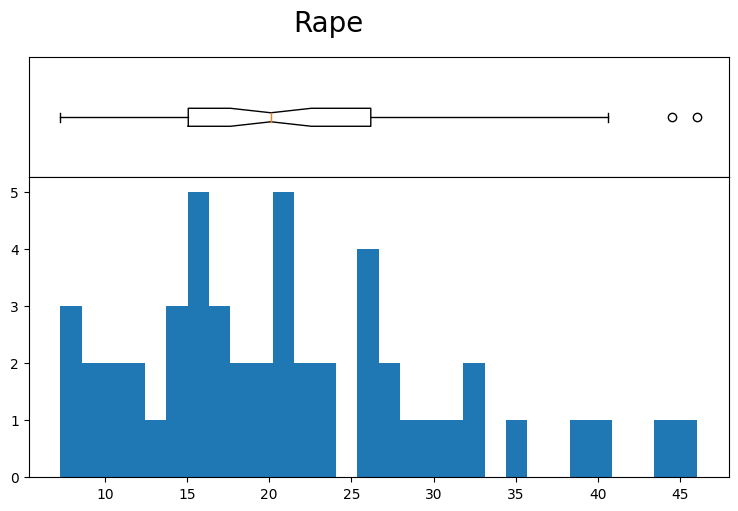

In [12]:
def hist_box_plots(dataframe):
    for variable in dataframe.columns:
        # setup the figure and axes
        fig = plt.figure(figsize=(10,6))
        bpAx = fig.add_axes([0.2, 0.7, 0.7, 0.2])   # left, bottom, width, height:
                                                    # (adjust as necessary)
        histAx = fig.add_axes([0.2, 0.2, 0.7, 0.5]) # left specs should match and
                                                    # bottom + height on this line should
                                                    # equal bottom on bpAx line
        fig.suptitle(t=variable, fontsize=20)
        # plot stuff
        bp = bpAx.boxplot(data[variable], notch=True, vert=False)
        h = histAx.hist(data[variable], bins=30)

        # confirm that the axes line up 
        xlims = np.array([bpAx.get_xlim(), histAx.get_xlim()])
        for ax in [bpAx, histAx]:
            ax.set_xlim([xlims.min(), xlims.max()])

        bpAx.set_xticklabels([])  # clear out overlapping xlabels
        bpAx.set_yticks([])  # don't need that 1 tick mark
        plt.show()

# apply the function
hist_box_plots(data.loc[:, ["UrbanPop", "Assault", "Murder", "Rape"]])

Numeric data look like realistic. Only the Rape variable contains outliers. However, I won't remove them.